In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df = pd.read_excel('src/get_around_delay_analysis.xlsx')

In [3]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 21310

Display of dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN



Basics statistics: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000



Percentage of missing values: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

In [65]:
fig = px.pie(df, values=df['state'].value_counts(), names=['mobile','connect'], title='Differents agreements for rental')
fig.show()

<AxesSubplot: xlabel='state', ylabel='count'>

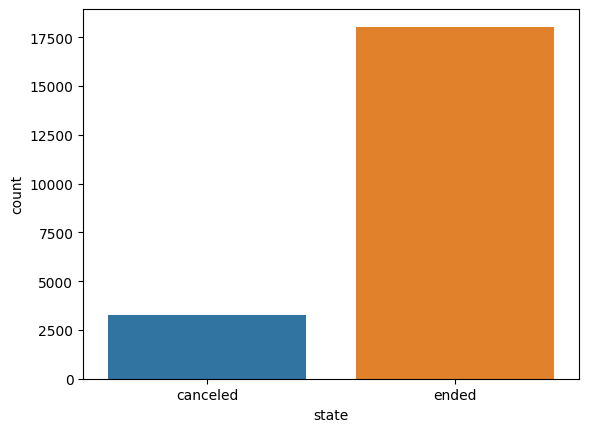

In [5]:
#plot
sns.countplot(data = df, x='state')

In [6]:
df_canceled = df[df['state'] == 'canceled']
df_ended = df[df['state'] == 'ended']
print(len(df_canceled))
print(len(df_ended))

3265
18045


In [7]:
print("Percentage of missing values for canceled state: ")
display(100*df_canceled.isnull().sum()/df_canceled.shape[0])

Percentage of missing values for canceled state: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  99.969372
previous_ended_rental_id                      92.986217
time_delta_with_previous_rental_in_minutes    92.986217
dtype: float64

In [8]:
print("Percentage of missing values for ended state: ")
display(100*df_ended.isnull().sum()/df_ended.shape[0])

Percentage of missing values for ended state: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                   9.420892
previous_ended_rental_id                      91.066778
time_delta_with_previous_rental_in_minutes    91.066778
dtype: float64

In [9]:
df_early = df_ended[df_ended['delay_at_checkout_in_minutes'] <= 0]
df_late = df_ended[df_ended['delay_at_checkout_in_minutes'] > 0]
print(len(df_early))
print(len(df_late))

6941
9404


In [10]:
print("Percentage of missing values for early checkin: ")
display(100*df_early.isnull().sum()/df_early.shape[0])

Percentage of missing values for early checkin: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                   0.000000
previous_ended_rental_id                      89.727705
time_delta_with_previous_rental_in_minutes    89.727705
dtype: float64

In [11]:
print("Percentage of missing values for late checkin: ")
display(100*df_late.isnull().sum()/df_late.shape[0])

Percentage of missing values for late checkin: 


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                   0.000000
previous_ended_rental_id                      91.471714
time_delta_with_previous_rental_in_minutes    91.471714
dtype: float64

In [12]:
df_late['delay_at_checkout_in_minutes'].median()

53.0

In [13]:
df_late['delay_at_checkout_in_minutes'].mean().round(2)

201.79

In [14]:
checkout = []
for x in df_ended['delay_at_checkout_in_minutes']:
    if x < 0:
        checkout.append('Early')
    elif x < 30:
        checkout.append('Late under 30 min')
    elif x < 60:
        checkout.append('Late 30-60 min')
    elif x < 120 :
        checkout.append('Late 60-120 min')
    elif x < 180 :
        checkout.append('Late 120-180 min')
    elif x >= 180 :
        checkout.append('Late more than 180 min')          
    else:
        checkout.append('NA')

df_ended['checkout'] = checkout
df_ended['checkout'].value_counts()


C:\Users\dunca\AppData\Local\Temp\ipykernel_7832\920057124.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Early                     6819
Late under 30 min         3376
Late 60-120 min           1860
Late more than 180 min    1766
Late 30-60 min            1722
NA                        1700
Late 120-180 min           802
Name: checkout, dtype: int64

In [15]:
df_ended.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,checkout
1,507750,269550,mobile,ended,-81.0,NaN,NaN,Early
2,508131,359049,connect,ended,70.0,NaN,NaN,Late 60-120 min
4,511440,313932,mobile,ended,NaN,NaN,NaN,NA
5,511626,398802,mobile,ended,-203.0,NaN,NaN,Early
6,511639,370585,connect,ended,-15.0,563782.0,570.0,Early


In [16]:
#keeping only values (not NA)
df_ended = df_ended[df_ended['checkout'] != 'NA']

In [17]:
df_ended.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,checkout
1,507750,269550,mobile,ended,-81.0,NaN,NaN,Early
2,508131,359049,connect,ended,70.0,NaN,NaN,Late 60-120 min
5,511626,398802,mobile,ended,-203.0,NaN,NaN,Early
6,511639,370585,connect,ended,-15.0,563782.0,570.0,Early
7,512303,371242,mobile,ended,-44.0,NaN,NaN,Early


In [18]:
df_ended['checkout'].value_counts()

Early                     6819
Late under 30 min         3376
Late 60-120 min           1860
Late more than 180 min    1766
Late 30-60 min            1722
Late 120-180 min           802
Name: checkout, dtype: int64

In [19]:
#pie for checkout time
labels = ["Early", "Late under 30 min","Late 60-120 min", "Late more than 180 min", "Late 30-60 min", 'Late 120-180 min']

fig = go.Figure(data=[go.Pie(labels=labels, values=df_ended['checkout'].value_counts(), textinfo='label+percent',
                             insidetextorientation='radial',
                             pull=[0, 0, 0.2, 0.2, 0., 0]
                            )])
fig.update(layout_title_text='Checkout time : Early and Late',
          layout_legend=dict(yanchor="top", y=0.6, xanchor="left", x=-1
))

fig.show()

<AxesSubplot: xlabel='checkout', ylabel='count'>

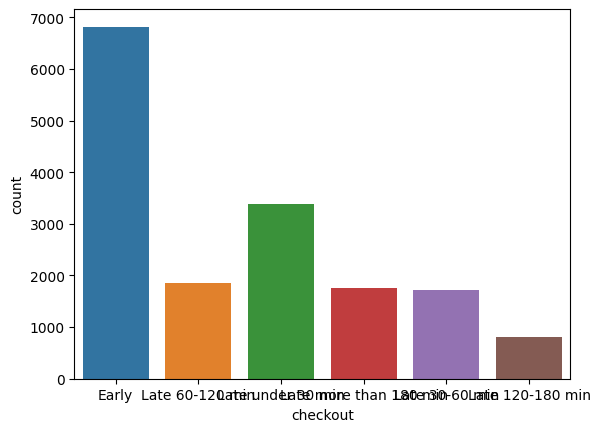

In [20]:
sns.countplot(data = df_ended, x='checkout')

In [21]:
df['state'].value_counts().index

Index(['ended', 'canceled'], dtype='object')

In [22]:
df['state'].value_counts()[1]

3265

<AxesSubplot: xlabel='time_delta_with_previous_rental_in_minutes', ylabel='count'>

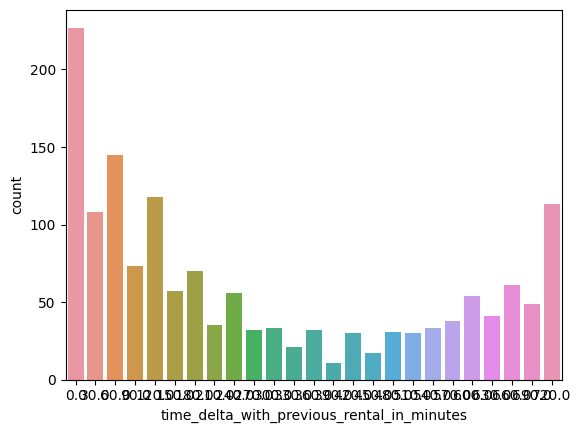

In [26]:
#df_ended['time_delta_with_previous_rental_in_minutes']
sns.countplot(data = df_ended, x='time_delta_with_previous_rental_in_minutes')

In [50]:

late = []
for x in df['delay_at_checkout_in_minutes']:
    if x < 0:
        late.append('later')
    else:
        late.append('earlier')

df['late'] = late

rented_again = []
for x in df['time_delta_with_previous_rental_in_minutes']:
    if x >=0:
        rented_again.append('Yes again')
    else:
        rented_again.append('No rental')
    
df['rented_again'] = rented_again

In [51]:
df.groupby(['rented_again', 'late', 'state'], as_index=False).size()

,rented_again,late,state,size
0,No rental,earlier,canceled,3035
1,No rental,earlier,ended,10313
2,No rental,later,canceled,1
3,No rental,later,ended,6120
4,Yes again,earlier,canceled,229
5,Yes again,earlier,ended,913
6,Yes again,later,ended,699


In [52]:
# proportion of canceled rentals for the whole rentals
fig = px.sunburst(pd.DataFrame(df.groupby(['rented_again', 'late', 'state'], as_index=False).size()),
                    path = ['rented_again', 'late', 'state'],
                    values='size',
                )
fig.update_traces(textinfo="label+percent parent")
fig.update_layout(title={'text': "waiting...", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                    autosize=False,
                    height=500,
                    width=500,
                    title_font_color="#D50425")
fig.show()